# Pharmaceutical Companies Racing for Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Pharmaceutical Companie Vanccine 
symbols = ['XLB']
start = '2018-01-01'
end = '2019-08-29'

In [3]:
df1 = pd.DataFrame()
for s in symbols:
    df1[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df1.index[-1] - df1.index[0]).days
days

603

In [7]:
df1.head()

XLB
Date                 
2018-01-02  61.389999
2018-01-03  61.820000
2018-01-04  62.360001
2018-01-05  62.860001
2018-01-08  62.950001

In [8]:
# Next Ticker 
symbols = ['XLE']
start = '2018-01-01'
end = '2019-08-29'

In [9]:
df2 = pd.DataFrame()
for s in symbols:
    df2[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [11]:
number_of_years = delta.years

In [12]:
days = (df2.index[-1] - df2.index[0]).days
days

603

In [13]:
df2.head()

XLE
Date                 
2018-01-02  73.449997
2018-01-03  74.550003
2018-01-04  75.000000
2018-01-05  74.970001
2018-01-08  75.419998

In [14]:
# Next Ticker 
symbols = ['XLK']
start = '2018-01-01'
end = '2019-08-29'

In [15]:
df3 = pd.DataFrame()
for s in symbols:
    df3[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [16]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [17]:
number_of_years = delta.years

In [18]:
days = (df3.index[-1] - df3.index[0]).days
days

603

In [19]:
df3.head()

XLK
Date                 
2018-01-02  64.739998
2018-01-03  65.279999
2018-01-04  65.610001
2018-01-05  66.300003
2018-01-08  66.550003

In [20]:
# Next Ticker 
symbols = ['XLF']
start = '2018-01-01'
end = '2019-08-29'

In [21]:
df4 = pd.DataFrame()
for s in symbols:
    df4[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [22]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [23]:
number_of_years = delta.years

In [24]:
days = (df4.index[-1] - df4.index[0]).days
days

603

In [25]:
df4.head()

XLF
Date                 
2018-01-02  27.920000
2018-01-03  28.070000
2018-01-04  28.330000
2018-01-05  28.410000
2018-01-08  28.370001

In [26]:
stocks = pd.concat([df1,df2,df3,df4],axis=1)
stocks.columns = ['XLB','XLE','XLK','XLF'] 

In [27]:
stocks.head()

XLB        XLE        XLK        XLF
Date                                                  
2018-01-02  61.389999  73.449997  64.739998  27.920000
2018-01-03  61.820000  74.550003  65.279999  28.070000
2018-01-04  62.360001  75.000000  65.610001  28.330000
2018-01-05  62.860001  74.970001  66.300003  28.410000
2018-01-08  62.950001  75.419998  66.550003  28.370001

In [28]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

XLB   -0.000171
XLE   -0.000535
XLK    0.000551
XLF   -0.000063
dtype: float64

In [29]:
stocks.pct_change(1).corr()

XLB       XLE       XLK       XLF
XLB  1.000000  0.702178  0.751568  0.748709
XLE  0.702178  1.000000  0.649221  0.656151
XLK  0.751568  0.649221  1.000000  0.745162
XLF  0.748709  0.656151  0.745162  1.000000

# Simulating Thousands of Possible Allocations

In [30]:
stocks.head()

XLB        XLE        XLK        XLF
Date                                                  
2018-01-02  61.389999  73.449997  64.739998  27.920000
2018-01-03  61.820000  74.550003  65.279999  28.070000
2018-01-04  62.360001  75.000000  65.610001  28.330000
2018-01-05  62.860001  74.970001  66.300003  28.410000
2018-01-08  62.950001  75.419998  66.550003  28.370001

<AxesSubplot:xlabel='Date'>

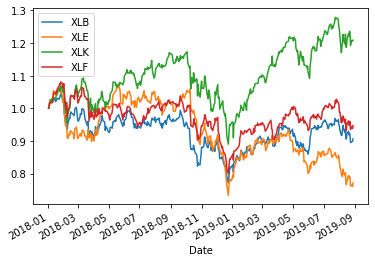

In [31]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [32]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

XLB       XLE       XLK       XLF
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03  0.007004  0.014976  0.008341  0.005372
2018-01-04  0.008735  0.006036  0.005055  0.009263
2018-01-05  0.008018 -0.000400  0.010517  0.002824
2018-01-08  0.001432  0.006002  0.003771 -0.001408

# Log Returns vs Arithmetic Returns

In [33]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

XLB       XLE       XLK       XLF
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03  0.006980  0.014865  0.008306  0.005358
2018-01-04  0.008697  0.006018  0.005042  0.009220
2018-01-05  0.007986 -0.000400  0.010462  0.002820
2018-01-08  0.001431  0.005984  0.003764 -0.001409

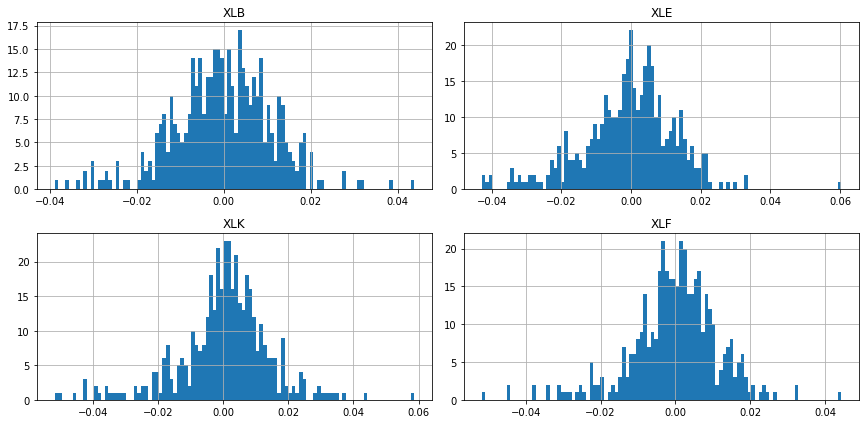

In [34]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [35]:
log_ret.describe().transpose()

count      mean       std       min       25%       50%       75%  \
XLB  416.0 -0.000238  0.011637 -0.038956 -0.006949 -0.000338  0.007324   
XLE  416.0 -0.000624  0.013356 -0.042860 -0.007667  0.000266  0.007390   
XLK  416.0  0.000454  0.013962 -0.051786 -0.005198  0.001573  0.007894   
XLF  416.0 -0.000132  0.011746 -0.051724 -0.005368  0.000707  0.006735   

          max  
XLB  0.043809  
XLE  0.060362  
XLK  0.058642  
XLF  0.044276

In [36]:
log_ret.mean() * 252

XLB   -0.060010
XLE   -0.157326
XLK    0.114347
XLF   -0.033223
dtype: float64

In [37]:
# Compute pairwise covariance of columns
log_ret.cov()

XLB       XLE       XLK       XLF
XLB  0.000135  0.000109  0.000122  0.000102
XLE  0.000109  0.000178  0.000121  0.000103
XLK  0.000122  0.000121  0.000195  0.000122
XLF  0.000102  0.000103  0.000122  0.000138

In [38]:
log_ret.cov()*252 # multiply by days

XLB       XLE       XLK       XLF
XLB  0.034128  0.027507  0.030791  0.025813
XLE  0.027507  0.044956  0.030499  0.025953
XLK  0.030791  0.030499  0.049123  0.030817
XLF  0.025813  0.025953  0.030817  0.034766

In [39]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['XLB', 'XLE', 'XLK', 'XLF'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
-0.09573143533473574


Expected Volatility
0.17864573544375698


Sharpe Ratio
-0.5358730511922848


In [40]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [41]:
sharpe_arr.max()

0.4651417147433217

In [42]:
sharpe_arr.argmax()

10095

In [43]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [44]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

# Plotting the data

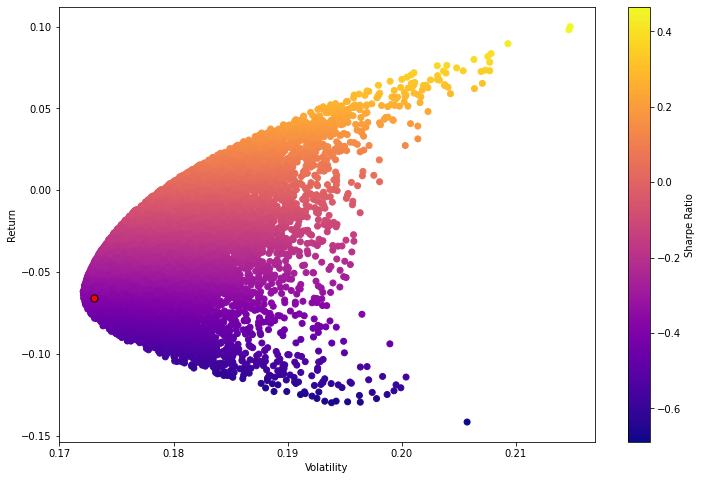

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')